In [37]:
##Read the csv file
import pandas as pd
import numpy as np
df1 = pd.read_csv("E:/Rakib Bhai/Selected_Features.csv")
df1

,GDP,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Debtor,Gender,Scholarship holder,Educational special needs,Tuition fees up to date,Target
0,0.0,0.00,0.000000,0.000000,0.000000,1,0,0.056604,0,1,0
1,1.0,0.30,0.735897,0.230769,0.741722,0,0,0.037736,0,1,2
2,0.0,0.00,0.000000,0.000000,0.000000,0,0,0.037736,0,1,0
3,1.0,0.25,0.667692,0.230769,0.711447,1,0,0.056604,0,0,2
4,1.0,0.30,0.700000,0.192308,0.653422,1,0,0.528302,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.25,0.682051,0.192308,0.720530,1,0,0.037736,0,1,2
4420,0.0,0.10,0.592308,0.230769,0.635762,0,0,0.018868,1,0,0
4421,0.0,0.05,0.726923,0.269231,0.790066,1,1,0.245283,0,0,0
4422,1.0,0.25,0.646154,0.192308,0.731126,1,1,0.056604,0,0,2


# Splitting the whole dataset into 80:20

In [38]:
from sklearn.model_selection import train_test_split
X = df1.drop('Target', axis=1)
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Ensemble Model

In [39]:
#Step_1: Import VotingClassifier
from sklearn.ensemble import VotingClassifier

#Step_2: Import all base classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#Step_3: Create all base classifier
b_rf  = RandomForestClassifier()
b_ada =AdaBoostClassifier()
b_xg = XGBClassifier()
b_gra = GradientBoostingClassifier()
b_lr = LogisticRegression()
b_knn = KNeighborsClassifier(n_neighbors=5)
b_nb  = GaussianNB()
b_dt = DecisionTreeClassifier()
b_sv = svm.SVC(probability=True)


# Create VotingClassifier 
VC = VotingClassifier (estimators=[('cl1', b_rf), ('cl2', b_ada), ('cl3', b_xg), ('cl4', b_gra), ('cl5', b_lr), ('cl_6', b_knn), ('cl_7', b_nb), ('cl8', b_dt), ('cl_9', b_sv)], voting='soft') 
                                                                     
# Create a classifier list
def get_models():
#Create a dictionary containing all classfiers
    models = dict()
    models['Random Forest'] = b_rf 
    models['Ada Boost'] = b_ada
    models['Xg Boost'] = b_xg
    models['Gradient Boosting'] = b_gra
    models['Logistic Regression'] =b_lr
    models['K Nearest Neighbor'] = b_knn
    models['Naive Bayes'] = b_nb
    models['Decision Tree'] = b_dt
    models['Support Vector Machine'] = b_sv
    models['Ensemble (Voting Classifirer)'] = VC
    return models   

# Get all classifiers from the classifier list
models = get_models()

predicts=list()
names=list()

# Create a classification block
def evaluate_model(model, X_train, y_train, X_test):
    #Create Stratified K Fold
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

print('-----------------Accuracy List-----------------')
# Pass all model and data to classification block
for name, model in models.items():
    predict = evaluate_model(model, X_train, y_train, X_test)
    predicts.append(predict)
    names.append(name)
    print('%s: ' %(name))
    print('Accuracy: %0.2f: ' %(metrics.accuracy_score(y_test, predict)*100))

-----------------Accuracy List-----------------
Random Forest: 
Accuracy: 100.00: 
Ada Boost: 
Accuracy: 100.00: 
Xg Boost: 
Accuracy: 100.00: 
Gradient Boosting: 
Accuracy: 100.00: 
Logistic Regression: 
Accuracy: 100.00: 
K Nearest Neighbor: 
Accuracy: 99.21: 
Naive Bayes: 
Accuracy: 100.00: 
Decision Tree: 
Accuracy: 100.00: 
Support Vector Machine: 
Accuracy: 100.00: 
Ensemble (Voting Classifirer): 
Accuracy: 100.00: 


# Confusion Matrix

Ensemble (Voting Classifier) accuracy: 1.0000


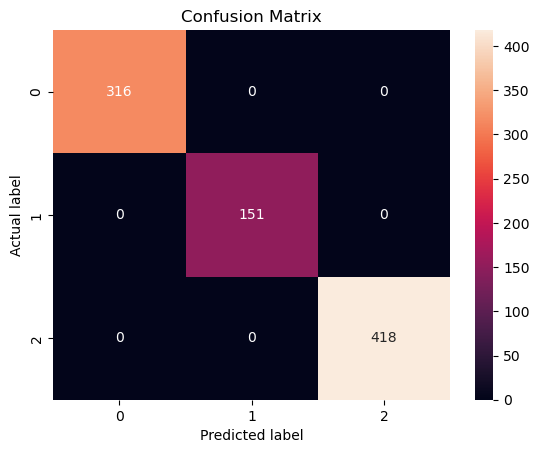

Test Accuracy: 1.0000
Training Accuracy: 1.0000

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00       316
    Enrolled       1.00      1.00      1.00       151
    Graduate       1.00      1.00      1.00       418

    accuracy                           1.00       885
   macro avg       1.00      1.00      1.00       885
weighted avg       1.00      1.00      1.00       885



In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

VC.fit(X_train, y_train)
y_pred_ensem = VC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ensem)
print(f"Ensemble (Voting Classifier) accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_ensem)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Overfitting Check
train_accuracy = VC.score(X_train, y_train)
test_accuracy = VC.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}\n")

# Classification Report
print(classification_report(y_test, y_predict_ensem, target_names=['Dropout', 'Enrolled', 'Graduate']))

# ROC Curve

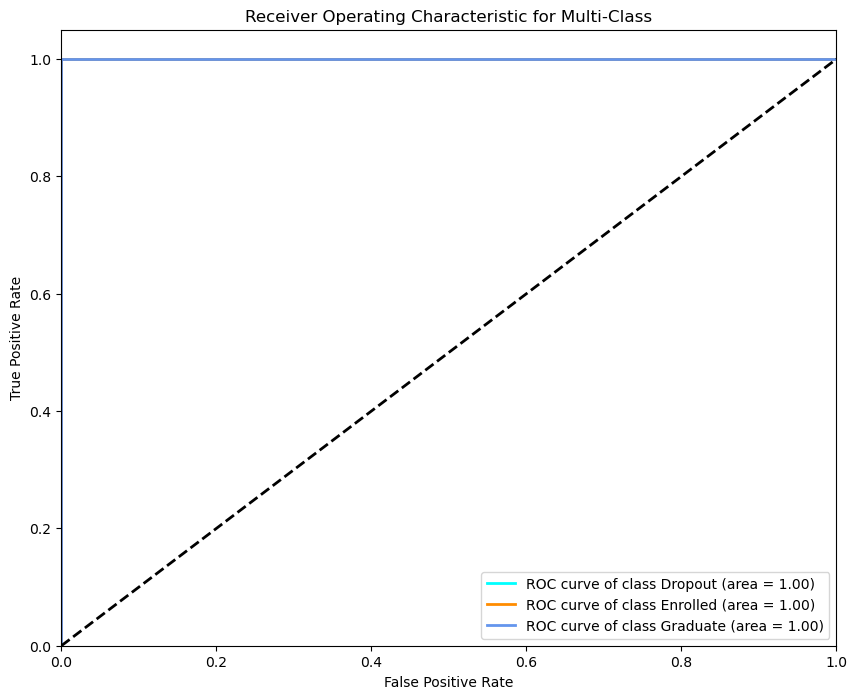

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

class_names = ['Dropout', 'Enrolled', 'Graduate']

# Binarizing the output labels for multi-class plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Getting the probabilities for each class from your trained ensemble model
y_prob = VC.predict_proba(X_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves.
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()